# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# para fazer mapas/dados geolocalizados
#!pip install geopandas
import geopandas as gpd

1. Criação do Banco de Dados com 215_000 linhas

In [ ]:
import csv

MAX_ROWS = 215_000

# Nome para o input
INPUT_CSV = 'MICRODADOS_ENEM_2022.csv'

# Novo banco de dados
NEW_BASE = 'Banco_de_dados_enem_2022-'

def make_new_csv(i, header=None):

    new_name = f'{NEW_BASE}{i}.csv'

    # Criação de um arquivo com o novo nome
    new_f = open(new_name, 'w', newline='')

    writer = csv.writer(new_f)

    if header:
        writer.writerow(header)

    return new_f, writer


with open(INPUT_CSV, newline='') as in_f:

    reader = csv.reader(in_f)

    your_header = next(reader)

    new_i = 1

    new_f, writer = make_new_csv(new_i, your_header)


    new_rows = 0
    for row in reader:
        if new_rows == MAX_ROWS:
            new_f.close()
            break
            new_i += 1
            new_f, writer = make_new_csv(new_i, your_header)
            new_rows = 0
        writer.writerow(row)
        new_rows +=1


    new_f.close()

2. Visão do Banco de Dados

**Utilizando o google drive para armazenar o banco de dados**

Como o Pandas consegue ler o arquivo CSV mesmo este estando zipado, o mesmo foi armazenado em formado ZIP para manter a integridade dos dados.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#usar essa celula caso for utilizar o google drive para puxar o banco de dados
#desse modo é possivel carregar todo o banco de dados.
df_enem = pd.read_csv('/content/drive/MyDrive/Banco de Dados/Microdados.zip', encoding = 'latin1', sep=';')


In [ ]:
df_enem = pd.read_csv('banco_de_dados_enem_2022-1.csv', encoding = 'latin1', sep=';')
df_enem


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214995,210055439048,2022,3,F,1,1,1,2,0,2,...,B,A,A,B,A,A,D,A,B,B
214996,210054617961,2022,4,M,1,1,1,1,1,1,...,A,A,A,B,A,A,D,A,B,B
214997,210057182759,2022,6,M,1,1,1,1,3,1,...,B,A,A,D,A,B,D,A,C,B
214998,210054930911,2022,4,F,1,2,1,1,2,1,...,A,A,A,B,A,A,C,A,A,B


In [ ]:
df_enem['TP_NACIONALIDADE'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

**NACIONALIDADE**

CÓDIGO | SIGNIFICADO
-------|-------------
1      | Brasileiro(a)
2      | Brasileiro(a) Naturalizado(a)
3      | Estrangeiro(a)
4      | Brasileiro(a) Nato(a), nascido(a) no exterior
0      | Não Informado

# Criação dos dicionarios para as categorias do banco de dados

In [ ]:
TP_FAIXA_ETARIA = {1:'Menor de 17 anos',
2:'17 anos',
3:'18 anos',
4:'19 anos',
5:'20 anos',
6:'21 anos',
7:'22 anos',
8:'23 anos',
9:'24 anos',
10:'25 anos',
11:'Entre 26 e 30 anos',
12:'Entre 31 e 35 anos',
13:'Entre 36 e 40 anos',
14:'Entre 41 e 45 anos',
15:'Entre 46 e 50 anos',
16:'Entre 51 e 55 anos',
17:'Entre 56 e 60 anos',
18:'Entre 61 e 65 anos',
19:'Entre 66 e 70 anos',
20:'Maior de 70 anos'}

TP_ESTADO_CIVIL = {0: 'Não informado',
1:'Solteiro(a)',
2:'Casado(a)/Mora com companheiro(a)',
3:'Divorciado(a)/Desquitado(a)/Separado(a)',
4:'Viúvo(a)'}

TP_COR_RACA = {0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indígena ',
6:'Não dispõe da informação'}

TP_NACIONALIDADE = {0:'Não informado',
1:'Brasileiro(a)',
2:'Brasileiro(a) Naturalizado(a)',
3:'Estrangeiro(a)',
4:'Brasileiro(a) Nato(a), nascido(a) no exterior'}

TP_ST_CONCLUSAO = {1:'Já concluí o Ensino Médio',
2:'Estou cursando e concluirei o Ensino Médio em 2022',
3:'Estou cursando e concluirei o Ensino Médio após 2022',
4:'Não concluí e não estou cursando o Ensino Médio'}

TP_ANO_CONCLUIU = {0:'Não informado',
1:'2021',
2:'2020',
3:'2019',
4:'2018',
5:'2017',
6:'2016',
7:'2015',
8:'2014',
9:'2013',
10:'2012',
11:'2011',
12:'2010',
13:'2009',
14:'2008',
15:'2007',
16:'Antes de 2007'}


TP_ESCOLA = { 1:'Não Respondeu', 2:'Pública', 3:'Privada'}

TP_ENSINO = {1:'Ensino Regular', 2:'Educação Especial - Modalidade Substitutiva'}


IN_TREINEIRO = {1:'Sim', 0:'Não'}


In [ ]:
df_enem

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214995,210055439048,2022,3,F,1,1,1,2,0,2,...,B,A,A,B,A,A,D,A,B,B
214996,210054617961,2022,4,M,1,1,1,1,1,1,...,A,A,A,B,A,A,D,A,B,B
214997,210057182759,2022,6,M,1,1,1,1,3,1,...,B,A,A,D,A,B,D,A,C,B
214998,210054930911,2022,4,F,1,2,1,1,2,1,...,A,A,A,B,A,A,C,A,A,B


In [ ]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215000 entries, 0 to 214999
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            215000 non-null  int64  
 1   NU_ANO                  215000 non-null  int64  
 2   TP_FAIXA_ETARIA         215000 non-null  int64  
 3   TP_SEXO                 215000 non-null  object 
 4   TP_ESTADO_CIVIL         215000 non-null  int64  
 5   TP_COR_RACA             215000 non-null  int64  
 6   TP_NACIONALIDADE        215000 non-null  int64  
 7   TP_ST_CONCLUSAO         215000 non-null  int64  
 8   TP_ANO_CONCLUIU         215000 non-null  int64  
 9   TP_ESCOLA               215000 non-null  int64  
 10  TP_ENSINO               76749 non-null   float64
 11  IN_TREINEIRO            215000 non-null  int64  
 12  CO_MUNICIPIO_ESC        48893 non-null   float64
 13  NO_MUNICIPIO_ESC        48893 non-null   object 
 14  CO_UF_ESC           

Excluímos as colunas de 51 a 75 do DataFrame, uma vez que esses dados não são relevantes para a análise em questão (Questionário Socio Economico).

In [ ]:
colunas_para_excluir = [f'Q00{i}' for i in range(1, 10)] + [f'Q0{i}' for i in range (10,26)] #Criação de uma lista para as colunas que serão excluídas
colunas_para_excluir
df_enem.drop(colunas_para_excluir, axis=1,inplace=True)

In [ ]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 51 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [ ]:
colunas = ['NU_ANO',
'TP_FAIXA_ETARIA',
'TP_SEXO',
'TP_ESTADO_CIVIL',
'TP_COR_RACA',
'TP_NACIONALIDADE',
'TP_ST_CONCLUSAO',
'TP_ANO_CONCLUIU',
'TP_ESCOLA',
'TP_ENSINO',
'IN_TREINEIRO']
colunas
#df_enem.describe(['NU_ANO','TP_FAIXA_ETARIA'])
#df_enem[colunas].describe()

['NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO']

A análise acima não faz sentido pois não trata-se de dados quantitativos

Análise Descritiva para as notas obtidas no exame



In [4]:
df_enem[['NU_INSCRICAO','NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210057943671,NaN,NaN,NaN,NaN,NaN
1,210057516120,NaN,NaN,NaN,NaN,NaN
2,210057280536,421.1,546.0,498.8,565.3,760.0
3,210055724397,490.7,388.6,357.8,416.0,320.0
4,210055097896,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3476100,210056389903,NaN,NaN,NaN,NaN,NaN
3476101,210057205644,NaN,NaN,NaN,NaN,NaN
3476102,210056699189,527.9,627.0,583.3,637.1,660.0
3476103,210056983033,NaN,NaN,NaN,NaN,NaN


**Há muitos valores NaN nas notas que precisarão ser tratados**

In [5]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']
descritivo_notas  = df_enem[notas].describe()

In [6]:
descritivo_notas.rename(columns={'NU_NOTA_CN':'Ciencias Naturais',
                                 'NU_NOTA_CH':'Ciencias Humanas',
                                 'NU_NOTA_LC': 'Linguagem e Código',
                                 'NU_NOTA_MT': 'Linguagem e Código',
                                 'NU_NOTA_REDACAO':'Redacao' },inplace=True)

descritivo_notas

,Ciencias Naturais,Ciencias Humanas,Linguagem e Código,Linguagem e Código,Redacao
count,2.355395e+06,2.493442e+06,2.493442e+06,2.355395e+06,2.493442e+06
mean,4.959305e+02,5.269531e+02,5.174389e+02,5.425032e+02,6.184797e+02
std,7.200975e+01,8.148446e+01,7.755491e+01,1.160225e+02,2.122125e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.405000e+02,4.770000e+02,4.684000e+02,4.490000e+02,5.200000e+02
50%,4.856000e+02,5.299000e+02,5.255000e+02,5.308000e+02,6.200000e+02
75%,5.433000e+02,5.819000e+02,5.732000e+02,6.224000e+02,7.600000e+02
max,8.753000e+02,8.392000e+02,8.010000e+02,9.857000e+02,1.000000e+03


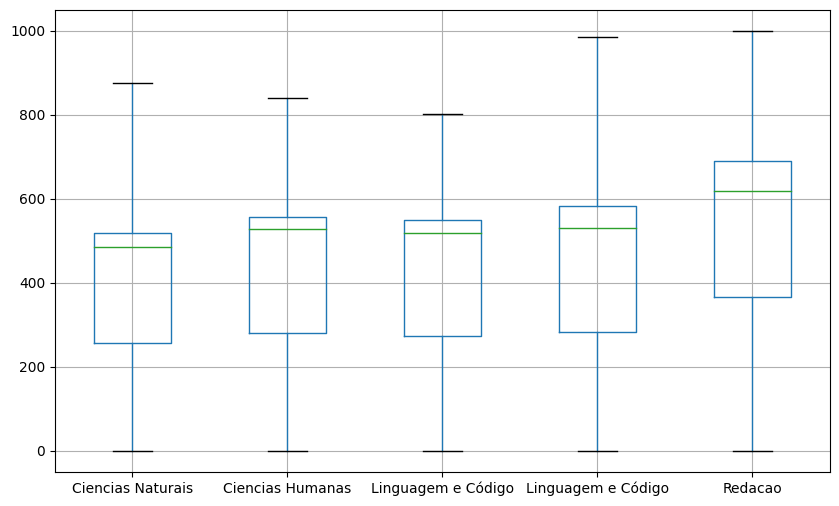

In [7]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
boxplot = descritivo_notas.drop('count').boxplot(widths=0.5)
figura = boxplot.get_figure()
plt.show()

# Distribuição de acordo com o sexo na realização da prova (M - masculino / F - Feminino)

In [ ]:
df_enem['TP_SEXO'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df_enem['TP_SEXO'].value_counts()

F    2120519
M    1355586
Name: TP_SEXO, dtype: int64

In [ ]:
df_enem['TP_SEXO'].value_counts(normalize=True)*100

F    61.002732
M    38.997268
Name: TP_SEXO, dtype: float64

# Distribuição de acordo com a raça/cor

In [ ]:
df_enem['TP_COR_RACA'].unique()
#TP_COR_RACA

array([2, 1, 3, 5, 0, 4], dtype=int64)

**Cor/Raça**

CÓDIGO | SIGNIFICADO
-------|-------------
0      | Não declarado
1      | Branca
2      | Preta
3      | Parda
4      | Amarela
5      | Indígena


In [ ]:
df_enem['TP_COR_RACA'].value_counts()

TP_COR_RACA
3    101051
1     75732
2     28792
4      4279
0      3867
5      1279
Name: count, dtype: int64

In [ ]:
df_enem['TP_COR_RACA'].value_counts(normalize=True)*100

TP_COR_RACA
3    47.000465
1    35.224186
2    13.391628
4     1.990233
0     1.798605
5     0.594884
Name: proportion, dtype: float64